In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np 

In [17]:
df = pd.read_csv ('EFIplus_medit.zip',compression="zip", sep= ";")

### Standardize, using z-score, the “Mean Annual Temperature” (Temp_ann), calculate the new mean, SD and 95% confidence interval, and plot the histogram

In [18]:
# Standardizing Temp_ann using Z-score
df["temp_ann_z"] = (df["temp_ann"] - df["temp_ann"].mean()) / df["temp_ann"].std()

In [19]:
# Calculating new mean, standard deviation, and 95% confidence interval
mean_temp = df["temp_ann_z"].mean()
sd_temp = df["temp_ann_z"].std()
ci_temp = stats.norm.interval(0.95, loc=mean_temp, scale=sd_temp/np.sqrt(len(df)))


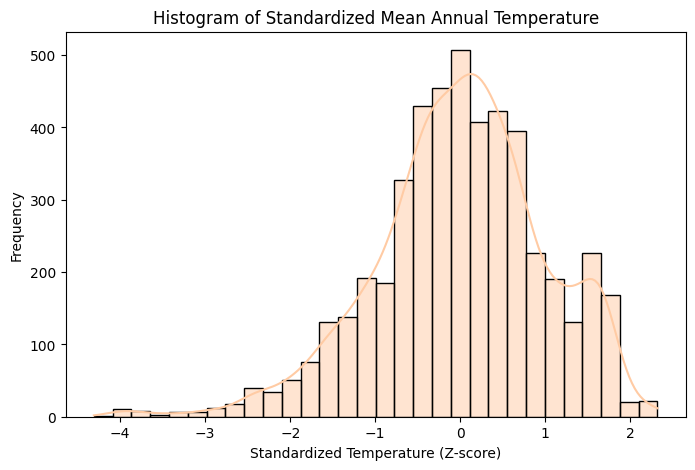

In [20]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["temp_ann_z"], bins=30, kde=True, color="#ffcba4")
plt.xlabel("Standardized Temperature (Z-score)")
plt.ylabel("Frequency")
plt.title("Histogram of Standardized Mean Annual Temperature")
plt.show()

In [21]:
print("Standardized Temperature Mean:", mean_temp)
print("Standardized Temperature SD:", sd_temp)
print("95% CI of Standardized Temperature:", ci_temp)

Standardized Temperature Mean: -7.749774106203943e-16
Standardized Temperature SD: 1.0
95% CI of Standardized Temperature: (np.float64(-0.02768763681911276), np.float64(0.02768763681911121))


### Test whether the means (or medians) of “Mean Annual Temperature” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test. 

In [22]:
# Testing differences in Temp_ann between presence/absence of Brown Trout
trout_present = df[df["Salmo trutta fario"] > 0]["temp_ann"]
trout_absent = df[df["Salmo trutta fario"] == 0]["temp_ann"]

In [23]:
t_stat, p_value = stats.ttest_ind(trout_present, trout_absent, equal_var=False)

print("T-test p-value:", p_value)

T-test p-value: nan


**Null Hypothesis (H0)**: The Mean Annual Temperature is the same for both groups.

In [24]:
u_stat, p_value_u = stats.mannwhitneyu(trout_present, trout_absent, alternative='two-sided')

print("Mann-Whitney U test p-value:", p_value_u)

Mann-Whitney U test p-value: nan


**Null Hypothesis (H0)**: The distribution for both groups are identical.

### Test whether there are diferences in the mean elevation in the upstream catchment(Elevation_mean_catch) among the eight most sampled catchments. 

In [25]:
# ANOVA to test mean elevation differences among 8 most sampled catchments
top_catchments = df["Catchment_name"].value_counts().nlargest(8).index
df_top = df[df["Catchment_name"].isin(top_catchments)]

anova_stat, p_value_anova = stats.f_oneway(
    *[df_top[df_top["Catchment_name"] == c]["Elevation_mean_catch"] for c in top_catchments]
)
null_hypothesis_2 = "The mean elevation is equal among the eight most sampled catchments."

print("ANOVA p-value:", p_value_anova)

ANOVA p-value: nan


**Results of Hypothesis Testing**

**Null Hypothesis (H0)**: There is no difference in mean (they're all the same) Mean Annual Temperature between presence and absence sites of *Salmo trutta fario*.

In [26]:
# Post-hoc pairwise comparisons using Tukey's HSD
tukey_results = stats.tukey_hsd(*[df_top[df_top["Catchment_name"] == c]["Elevation_mean_catch"] for c in top_catchments])

print("Tukey's HSD results:", tukey_results)


Tukey's HSD results: Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)        nan       nan       nan       nan
 (0 - 2)        nan       nan       nan       nan
 (0 - 3)        nan       nan       nan       nan
 (0 - 4)        nan       nan       nan       nan
 (0 - 5)        nan       nan       nan       nan
 (0 - 6)        nan       nan       nan       nan
 (0 - 7)        nan       nan       nan       nan
 (1 - 0)        nan       nan       nan       nan
 (1 - 2)   -475.269       nan       nan       nan
 (1 - 3)        nan       nan       nan       nan
 (1 - 4)        nan       nan       nan       nan
 (1 - 5)        nan       nan       nan       nan
 (1 - 6)        nan       nan       nan       nan
 (1 - 7)        nan       nan       nan       nan
 (2 - 0)        nan       nan       nan       nan
 (2 - 1)    475.269       nan       nan       nan
 (2 - 3)        nan       nan       nan       nan
 (2 - 4)   

### Which potential problems did you identified in the data that could limit the conclusions derived from the performed tests?

In [27]:
# Identifying potential problems in data
data_issues = []
if df.isnull().sum().any():
    data_issues.append("Missing values in some columns.")
if df.duplicated().sum() > 0:
    data_issues.append("Duplicate rows detected.")
if (df["temp_ann"] < -10).any() or (df["temp_ann"] > 50).any():
    data_issues.append("Unrealistic temperature values detected.")


print("Identified data issues:", data_issues)

Identified data issues: ['Missing values in some columns.']


It seems as though the main issue is the lack of data in the dataset.